# Support Vector Classifier Training

This notebook trains a SVC model on the Pima Indians Diabetes Dataset, to use in comparisons against the QML models when applying explainability techniques.

### Imports

In [9]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns

import os

# import data class
from utilities.dataset_utils import DiabetesData

# import metrics for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# import SVC
from sklearn.svm import SVC

# import GridSearchCV
from sklearn.model_selection import GridSearchCV, ParameterGrid

# import pipeline
from sklearn.pipeline import Pipeline

### Data Preparation

In [10]:
# path to diabetes.csv
path = os.path.join(os.getcwd(), '..', '..', 'utilities', 'diabetes.csv')
# load dataset class
dataset = DiabetesData(path)

In [11]:
# create a pipeline
svc = Pipeline([
    ('svc', SVC(class_weight='balanced'))
])

In [12]:
# create a parameter grid
svc_param_grid = {
    'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__gamma': [1, 0.1, 0.01, 0.001, 'scale', 'auto'],
    'svc__kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
    'svc__degree': [2, 3, 4, 5],
    'svc__coef0': [0.0, 0.1, 0.5, 1.0]
}

In [13]:
# calc amount of combinations to try
total_combinations = len(list(ParameterGrid(svc_param_grid)))
print(f'Total combinations to try: {total_combinations}')

Total combinations to try: 2304


### SVC Model Fit

In [14]:
# get training and testing data
X_train, X_test, y_train, y_test = dataset.preprocess_data()

In [15]:
# create a grid search for the svc
svc_gs = GridSearchCV(svc, svc_param_grid, scoring=['accuracy', 'f1'], cv=10, verbose=2, refit='f1')

In [16]:
# fit the grid search
svc_gs.fit(X_train, y_train)

Fitting 10 folds for each of 2304 candidates, totalling 23040 fits
[CV] END svc__C=0.001, svc__coef0=0.0, svc__degree=2, svc__gamma=1, svc__kernel=rbf; total time=   0.0s
[CV] END svc__C=0.001, svc__coef0=0.0, svc__degree=2, svc__gamma=1, svc__kernel=rbf; total time=   0.0s
[CV] END svc__C=0.001, svc__coef0=0.0, svc__degree=2, svc__gamma=1, svc__kernel=rbf; total time=   0.0s
[CV] END svc__C=0.001, svc__coef0=0.0, svc__degree=2, svc__gamma=1, svc__kernel=rbf; total time=   0.0s
[CV] END svc__C=0.001, svc__coef0=0.0, svc__degree=2, svc__gamma=1, svc__kernel=rbf; total time=   0.0s
[CV] END svc__C=0.001, svc__coef0=0.0, svc__degree=2, svc__gamma=1, svc__kernel=rbf; total time=   0.0s
[CV] END svc__C=0.001, svc__coef0=0.0, svc__degree=2, svc__gamma=1, svc__kernel=rbf; total time=   0.0s
[CV] END svc__C=0.001, svc__coef0=0.0, svc__degree=2, svc__gamma=1, svc__kernel=rbf; total time=   0.0s
[CV] END svc__C=0.001, svc__coef0=0.0, svc__degree=2, svc__gamma=1, svc__kernel=rbf; total time=   0.

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__coef0': [0.0, 0.1, 0.5, 1.0],
                         'svc__degree': [2, 3, 4, 5],
                         'svc__gamma': [1, 0.1, 0.01, 0.001, 'scale', 'auto'],
                         'svc__kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             refit='f1', scoring=['accuracy', 'f1'], verbose=2)

In [17]:
# get best params
svc_gs.best_params_, svc_gs.best_score_

({'svc__C': 100,
  'svc__coef0': 0.0,
  'svc__degree': 2,
  'svc__gamma': 1,
  'svc__kernel': 'rbf'},
 np.float64(0.6858523081952885))

In [18]:
# set svc best params
svc.set_params(**svc_gs.best_params_)

Pipeline(steps=[('svc',
                 SVC(C=100, class_weight='balanced', degree=2, gamma=1))])

In [19]:
# fit model with best params
svc.fit(X_train, y_train)

Pipeline(steps=[('svc',
                 SVC(C=100, class_weight='balanced', degree=2, gamma=1))])

### SVC Evaluation

In [20]:
train_score = svc.score(X_train, y_train)
test_score = svc.score(X_test, y_test)
train_score, test_score

(0.8338762214983714, 0.6948051948051948)

In [21]:
# predict
y_pred = svc.predict(X_test)

In [22]:
# confusion matrix
def conf_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title('Confusion Matrix: SVC')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [23]:
# accuracy score
accuracy = accuracy_score(y_test, y_pred)

In [24]:
# classification report
report = classification_report(y_test, y_pred, zero_division=0, output_dict=False)

Accuracy: 0.6948051948051948
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.69      0.75       100
           1       0.55      0.70      0.62        54

    accuracy                           0.69       154
   macro avg       0.68      0.70      0.68       154
weighted avg       0.72      0.69      0.70       154



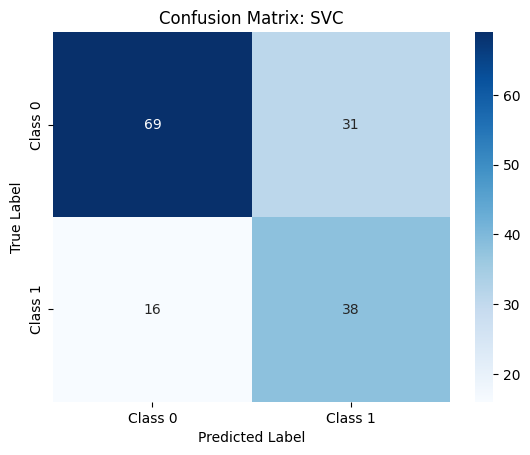

In [25]:
# print metrics
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
conf_matrix(y_test, y_pred)